**Descitpioin dataset**

-patch-fr: Dans chaque dossiers patch-fr et patch_us: dans plein de dossiers numérotés il y a pleins de dossiers numérotés, se trouve dedans des fichiers par groupe de 4 finissant par x00 où xx le non du dossier.

Groupes de 4 typiques: altitude et landcover en .tif et near_ir et rgb en .jpg (donc 4 images).

-observations: csv de train et de test pour les observations en fr et aux us

-metadata: détails sur les espèces (lien entre GBIF et nom espèces, species_id et leur nom...)

In [ ]:
import os

path_to_data = '/mounts/Datasets4/GeoLifeCLEF2022/'

print(os.listdir(path_to_data))


for folder in os.listdir(path_to_data):
    try:
        print(f'{folder}:',os.listdir(os.path.join(path_to_data,folder)))
    except:
        print('file:', os.path.join(path_to_data,folder))

['rasters', 'patches-us', 'patches_sample', 'pre-extracted', 'observations', 'patches-fr', 'sample_submission.csv', 'metadata']
rasters: ['bio_5', 'bio_14', 'bio_11', 'clyppt', 'bio_6', 'bio_10', 'bio_4', 'bio_12', 'bio_15', 'bio_19', 'bio_2', 'bio_3', 'bio_7', 'bio_9', 'bio_13', 'cecsol', 'sltppt', 'bdticm', 'bio_17', 'bio_16', 'bio_18', 'bio_1', 'phihox', 'bldfie', 'orcdrc', 'sndppt', 'bio_8']
patches-us: ['07', '87', '11', '89', '32', '19', '86', '08', '79', '70', '94', '37', '14', '99', '05', '35', '85', '60', '49', '45', '90', '44', '06', '20', '92', '53', '72', '17', '95', '29', '68', '83', '10', '57', '74', '28', '31', '81', '36', '96', '65', '91', '30', '78', '15', '25', '22', '55', '69', '88', '58', '67', '24', '39', '33', '03', '26', '23', '51', '84', '52', '54', '98', '43', '01', '13', '80', '71', '62', '12', '47', '61', '41', '64', '42', '34', '66', '16', '00', '09', '77', '75', '48', '40', '97', '38', '73', '82', '50', '63', '56', '02', '93', '04', '59', '76', '18', '46', 

In [1]:
import pandas as pd

path_to_observations = '/mounts/Datasets4/GeoLifeCLEF2022/observations'
observations_train_fr = '/mounts/Datasets4/GeoLifeCLEF2022/observations/observations_fr_train.csv'
observations_test_fr = '/mounts/Datasets4/GeoLifeCLEF2022/observations/observations_fr_test.csv'

df_train_fr = pd.read_csv(observations_train_fr, delimiter=';')
df_train_fr.head()

,observation_id,latitude,longitude,species_id,subset
0,10561949,45.705116,1.424622,241,train
1,10131188,45.146973,6.416794,101,train
2,10799362,46.783695,-2.072855,700,train
3,10392536,48.604866,-2.825003,1456,train
4,10335049,48.815567,-0.161431,157,train


In [2]:
df_train_fr.shape

(671244, 5)

In [3]:
df_train_fr.dtypes

observation_id      int64
latitude          float64
longitude         float64
species_id          int64
subset             object
dtype: object

In [4]:
df_train_fr.isna().sum()

observation_id    0
latitude          0
longitude         0
species_id        0
subset            0
dtype: int64

In [5]:
#corrélation des features entre eux
df_train_fr_corr = df_train_fr[['observation_id','latitude','longitude', 'species_id']]
df_train_fr_corr.corr()

,observation_id,latitude,longitude,species_id
observation_id,1.000000,0.001779,-0.001239,0.000476
latitude,0.001779,1.000000,-0.344810,-0.031915
longitude,-0.001239,-0.344810,1.000000,0.030698
species_id,0.000476,-0.031915,0.030698,1.000000


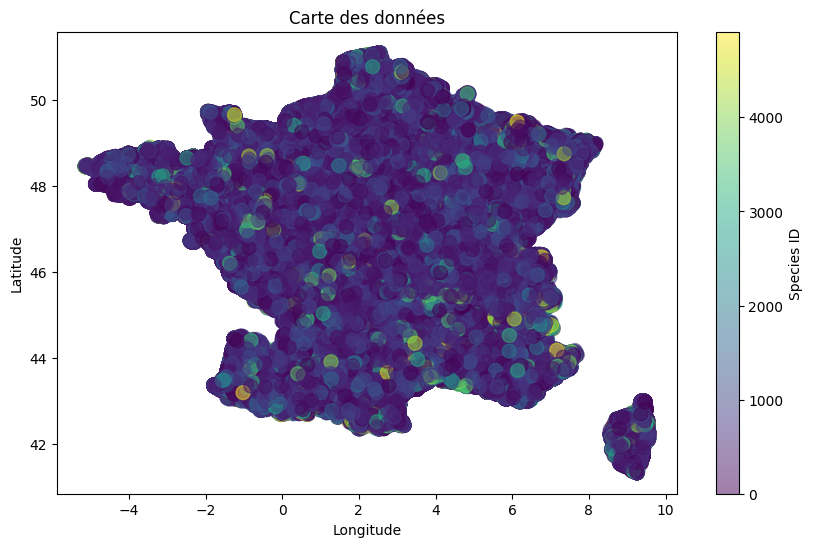

In [6]:
import matplotlib
import matplotlib.pyplot as plt

#répartition des données sur la carte 
df = df_train_fr
# Représentation sur une carte avec Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['species_id'], cmap='viridis', s=100, alpha=0.5)
plt.colorbar(label='Species ID')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Carte des données')

plt.show()

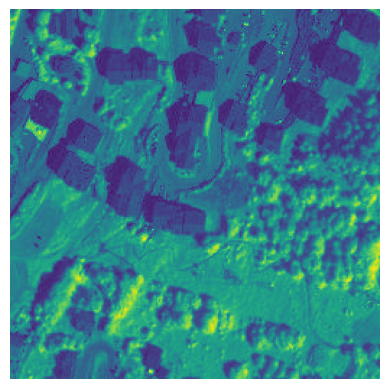

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



# Chemin vers ton image JPG
image_path_jpg = '/mounts/Datasets4/GeoLifeCLEF2022/patches-fr/00/00/10010000_near_ir.jpg'

# Charger et afficher l'image JPG
img_jpg = mpimg.imread(image_path_jpg)
plt.imshow(img_jpg)
plt.axis('off')  # Pour désactiver les axes
plt.show()

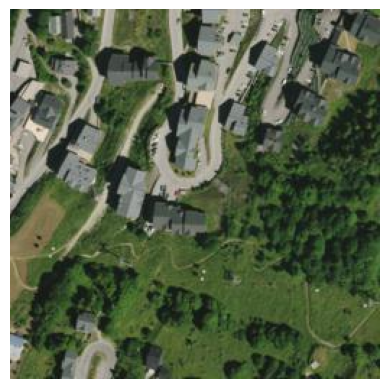

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chemin vers ton image JPG
image_path_jpg = '/mounts/Datasets4/GeoLifeCLEF2022/patches-fr/00/00/10010000_rgb.jpg'

# Charger et afficher l'image JPG
img_jpg = mpimg.imread(image_path_jpg)
plt.imshow(img_jpg)
plt.axis('off')  # Pour désactiver les axes
plt.show()

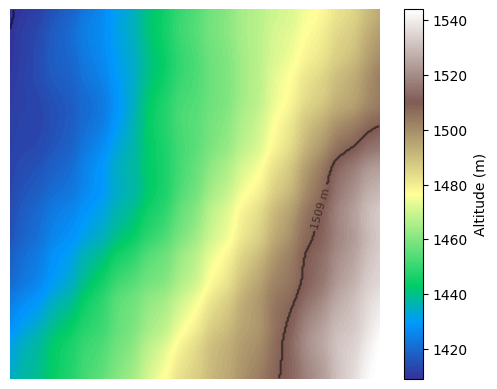

In [9]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

#ici on mesure l'atlitude, on extrait les courbes de niveau

# Chemin vers ton image TIFF
image_path_tiff = '/mounts/Datasets4/GeoLifeCLEF2022/patches-fr/00/00/10010000_altitude.tif'

# Charger l'image TIFF avec PIL
img_tiff = Image.open(image_path_tiff)

# Convertir l'image en tableau NumPy
img_array = np.array(img_tiff)

# Déterminer les niveaux des courbes de niveau (par exemple, tous les 100 mètres)
levels = np.arange(np.min(img_array), np.max(img_array), 100)  # Adapter les valeurs selon tes données

# Afficher l'image avec Matplotlib
plt.imshow(img_array, cmap='terrain')  # Afficher l'image d'altitude
plt.colorbar(label='Altitude (m)')  # Ajouter une barre de couleur pour l'altitude
contour = plt.contour(img_array, levels=levels, colors='black', alpha=0.5)  # Tracer les courbes de niveau

# Ajouter les étiquettes avec les valeurs d'altitude près des courbes
plt.clabel(contour, inline=True, fmt='%d m', fontsize=8)

plt.axis('off')  # Désactiver les axes
plt.show()


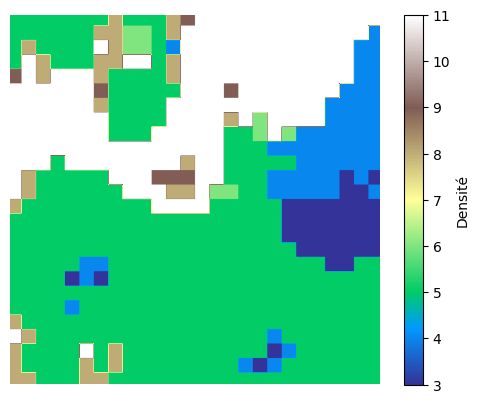

In [10]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

#land cover: couleur en fonction de ce qui recouvre le terrain

# Chemin vers ton image TIFF
image_path_tiff = '/mounts/Datasets4/GeoLifeCLEF2022/patches-fr/00/00/10010000_landcover.tif'

# Charger l'image TIFF avec PIL
img_tiff = Image.open(image_path_tiff)

# Convertir l'image en tableau NumPy
img_array = np.array(img_tiff)

# Afficher l'image avec Matplotlib
plt.imshow(img_array, cmap='terrain')  # 'terrain' est un exemple de colormap, tu peux en choisir une autre si tu préfères
plt.colorbar(label='Densité')  # Ajoute une barre de couleur avec une étiquette
plt.axis('off')  # Pour désactiver les axes
plt.show()


In [11]:
#étude des fichier .tif --> raster de 256 par 256 (1m par pixel)

path_tiff = '/mounts/Datasets4/GeoLifeCLEF2022/patches-fr/00/00/10000000_altitude.tif'
img_tiff = Image.open(path_tiff)
tiff_array = np.array(img_tiff)
print(tiff_array)
print(tiff_array.shape)

[[2221 2221 2221 ... 2308 2309 2309]
 [2220 2221 2221 ... 2308 2308 2309]
 [2220 2220 2221 ... 2308 2308 2309]
 ...
 [2188 2188 2188 ... 2283 2284 2284]
 [2187 2187 2187 ... 2283 2284 2284]
 [2187 2187 2187 ... 2283 2283 2284]]
(256, 256)


In [12]:
#étude du lien les csv et els patches

path_train = '/mounts/Datasets4/GeoLifeCLEF2022/observations/observations_fr_train.csv'

df_train = pd.read_csv(path_train,delimiter=';')
df_train.columns


Index(['observation_id', 'latitude', 'longitude', 'species_id', 'subset'], dtype='object')

In [44]:
#on regarde le premier groupe de 4 fichiers et on vérifie que l'observation id 10561949 correspond bien au 1 fichier du 1er dossier du 1er dossier des patchs

df_filter = df[df['observation_id'] == 10561949] #en résultat on voie qu'on a ici une sorte de poule

#on regarde en mergeant deux dataframe quelle est l'espèce qui correspond à ces fichiers

df_species = pd.read_csv('/mounts/Datasets4/GeoLifeCLEF2022/metadata/species_details.csv', delimiter=';')

df_merge = df_filter.merge(df_species, on='species_id', how='inner')
df_merge = df_merge[['observation_id', 'latitude', 'longitude', 'species_id', 'subset', 'species_id', 'GBIF_species_name']]
df_merge.head()
#remarque: pour accéder à un fichier on écrit: path/observations_id[-3,-1]/observations_id[-5,-3]/observatioon_id + '_altitude.tif' par exemple

,observation_id,latitude,longitude,species_id,subset,species_id,GBIF_species_name
0,10561949,45.705116,1.424622,241,train,241,Hypochaeris glabra


**Première chose étrange: il n'y a qu'une espèce par sample dans le train et aucune dans le test**

-Quand on génère 30 pédictions le but est juste que le bonne espèce tombe dans les 30 prédites

-mais comment utiliser l'ensemble test s'il n'a que des id d'observation de slongitudes et des latitudes?

In [43]:
#on étudie les chemins vers le spatchs qui sont nos données brutes

!pwd
!cd /mounts/Datasets4/GeoLifeCLEF2022/patches-fr; ls
print('In one of this folder there is:')
!cd /mounts/Datasets4/GeoLifeCLEF2022/patches-fr; cd '00'; ls

print('ce que l on trouve dans ces sous dossier')
!cd /mounts/Datasets4/GeoLifeCLEF2022/patches-fr; cd '00'; cd '00'; ls

#premier chiffre 1 pour la France et 2 pour les Etats-unis (ici juste France)

#chaque numéro est associé à 4 fichier


/usr/users/sdi-labworks-2023-2024/sdi-labworks-2023-2024_32/projet_deep


00  05	10  15	20  25	30  35	40  45	50  55	60  65	70  75	80  85	90  95
01  06	11  16	21  26	31  36	41  46	51  56	61  66	71  76	81  86	91  96
02  07	12  17	22  27	32  37	42  47	52  57	62  67	72  77	82  87	92  97
03  08	13  18	23  28	33  38	43  48	53  58	63  68	73  78	83  88	93  98
04  09	14  19	24  29	34  39	44  49	54  59	64  69	74  79	84  89	94  99
In one of this folder there is:
00  05	10  15	20  25	30  35	40  45	50  55	60  65	70  75	80  85	90  95
01  06	11  16	21  26	31  36	41  46	51  56	61  66	71  76	81  86	91  96
02  07	12  17	22  27	32  37	42  47	52  57	62  67	72  77	82  87	92  97
03  08	13  18	23  28	33  38	43  48	53  58	63  68	73  78	83  88	93  98
04  09	14  19	24  29	34  39	44  49	54  59	64  69	74  79	84  89	94  99
ce que l on trouve dans ces sous dossier
10000000_altitude.tif	10240000_rgb.jpg	10560000_near_ir.jpg
10000000_landcover.tif	10250000_altitude.tif	10560000_rgb.jpg
10000000_near_ir.jpg	10250000_landcover.tif	10570000_altitude.tif
10000000_rgb.jpg	10250000_near_ir.jpg	1

In [1]:
#on regarde le csv des observations qui contient les info sur la position où nos données ont été observées

!head -n 10 '/mounts/Datasets4/GeoLifeCLEF2022/observations/observations_fr_train.csv' #head -n 10 'path' est le cat limité à 10 lignes


observation_id;latitude;longitude;species_id;subset
10561949;45.70511627197271;1.4246221780776998;241;train
10131188;45.14697265625;6.416794300079349;101;train
10799362;46.783695220947294;-2.07285499572754;700;train
10392536;48.604866027832;-2.82500338554382;1456;train
10335049;48.8155670166016;-0.161430716514587;157;train
10316490;47.2107810974121;-1.56957256793976;305;train
10069683;45.0586128234863;4.85277795791626;316;train
10012782;43.2971878051758;-0.3544881939888;318;train
10389656;50.4722404479981;2.5587403774261497;346;train


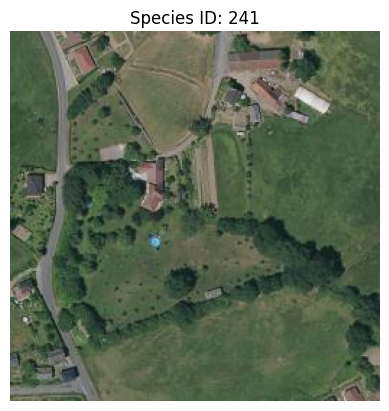

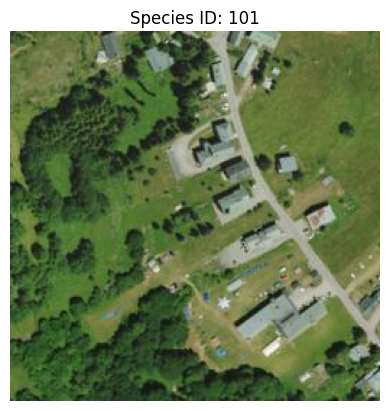

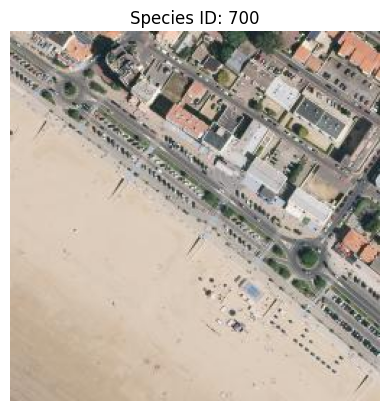

In [25]:
#on fait un test pour voir si l'observation id renseignée dans le information csv correspond bien aux documents qui commence par les même 8 première lettres

import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

df = pd.read_csv('/mounts/Datasets4/GeoLifeCLEF2022/observations/observations_fr_train.csv', delimiter =';')
for id in df['observation_id'][:3]:
    base_path = '/mounts/Datasets4/GeoLifeCLEF2022/patches-fr/'
    id = str(id)
    path_to_rgb = base_path + id[-2:] + '/' + id[-4:-2]+ '/' + id + '_rgb.jpg'
    if os.path.exists(path_to_rgb):
        # Charger et afficher l'image
        image = Image.open(path_to_rgb)
        species_id = df[df['observation_id'] == int(id)]['species_id'].values[0]
        plt.imshow(image)
        plt.title(f'Species ID: {species_id}')
        plt.axis('off')  # Pour enlever les axes si nécessaire
        plt.show()
    else:
        print(f"L'image pour l'ID {observation_id} n'a pas été trouvée.")
        print(path_to_rgb)



In [25]:
import os
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
import torch

class image_loader(Dataset):
    def __init__(self, annotations_file='/mounts/Datasets4/GeoLifeCLEF2022/observations/observations_fr_train.csv', img_dir='patches-fr', transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, delimiter=';')
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.to_tensor = transforms.ToTensor()

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        idx += 1  # Commencer l'index à 1 au lieu de 0

        base_path = '/mounts/Datasets4/GeoLifeCLEF2022/patches-fr/'
            
        observation_id = str(self.img_labels.iloc[idx, 0])  # Correction de l'indice pour accéder aux données

        images = []
        for image_suffix in ['_rgb.jpg', '_near_ir.jpg', '_landcover.tif', '_altitude.tif']:
            img_path = os.path.join(base_path, observation_id[-2:], observation_id[-4:-2], observation_id + image_suffix)

            if os.path.exists(img_path):
                image = Image.open(img_path)
                images.append(image)
            else:
                print(f"Image non trouvée pour l'ID {observation_id}")
                return None

        label = self.img_labels.loc[self.img_labels['observation_id'] == int(observation_id), 'species_id'].values[0]

        if len(images) != 4:  # Vérifier que les 4 images sont présentes avant de retourner le résultat
            return None

        if self.transform:
            images = [self.transform(img) for img in images]

        if self.target_transform:
            label = self.target_transform(label)

        images = [self.to_tensor(img) for img in images]  # Convertir les images en tenseurs PyTorch

        return images, label

#On teste que le dataloader marche bien

# Transformation pour redimensionner les images à une taille spécifique (par exemple 256x256)
data_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    # Ajoute d'autres transformations si nécessaire
])

# Création de l'instance du DataLoader
dataset = image_loader(transform=data_transform) #donc maintenant on fait du resize et du to_tensor()
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Utilisation du DataLoader pour charger les données
for batch_idx, (images, label) in enumerate(dataloader):
    if images is not None:
        print(f"Batch {batch_idx + 1}:")  # Correction pour afficher le batch à partir de 1
        for i in range(len(images)):
            print(f"Image {i+1} - Shape: {images[i].size()}")
        print(f"Label: {label}")


Batch 1:
Image 1 - Shape: torch.Size([1, 3, 256, 256])
Image 2 - Shape: torch.Size([1, 1, 256, 256])
Image 3 - Shape: torch.Size([1, 1, 256, 256])
Image 4 - Shape: torch.Size([1, 1, 256, 256])
Label: tensor([653])
Batch 2:
Image 1 - Shape: torch.Size([1, 3, 256, 256])
Image 2 - Shape: torch.Size([1, 1, 256, 256])
Image 3 - Shape: torch.Size([1, 1, 256, 256])
Image 4 - Shape: torch.Size([1, 1, 256, 256])
Label: tensor([1265])
Batch 3:
Image 1 - Shape: torch.Size([1, 3, 256, 256])
Image 2 - Shape: torch.Size([1, 1, 256, 256])
Image 3 - Shape: torch.Size([1, 1, 256, 256])
Image 4 - Shape: torch.Size([1, 1, 256, 256])
Label: tensor([687])
Batch 4:
Image 1 - Shape: torch.Size([1, 3, 256, 256])
Image 2 - Shape: torch.Size([1, 1, 256, 256])
Image 3 - Shape: torch.Size([1, 1, 256, 256])
Image 4 - Shape: torch.Size([1, 1, 256, 256])
Label: tensor([743])
Batch 5:
Image 1 - Shape: torch.Size([1, 3, 256, 256])
Image 2 - Shape: torch.Size([1, 1, 256, 256])
Image 3 - Shape: torch.Size([1, 1, 256, 25

KeyboardInterrupt: 